# Canny Edge Detection

#### Goal:

• Concept of Canny edge detection

• OpenCV functions for that : cv2.Canny()

### What is Canny Edge Detection?
Canny Edge Detection is a popular edge detection algorithm. It was developed by John F. Canny in 1986. It is a
multi-stage algorithm and we will go through each stages.

 #### 1. Noise Reduction :
 Since edge detection is susceptible to noise in the image, first step is to remove the noise in the image with a 5x5
Gaussian filter.

#### 2. Finding Intensity Gradient of the Image
Smoothened image is then filtered with a Sobel kernel in both horizontal and vertical direction to get first derivative in
horizontal direction (G x ) and vertical direction (G y ). From these two images, we can find edge gradient and direction
for each pixel as follows:

$$Edge Gradient (G)  = \sqrt{G_x^2 + G_y^2}$$
$$Angle (\theta)=\tan^{-1}(\frac{G_x}{G_y})$$

Gradient direction is always perpendicular to edges. It is rounded to one of four angles representing vertical, horizontal
and two diagonal directions.

#### 3. Non-maximum Suppression
After getting gradient magnitude and direction, a full scan of image is done to remove any unwanted pixels which may
not constitute the edge. For this, at every pixel, pixel is checked if it is a local maximum in its neighborhood in the
direction of gradient. Check the image below:

![](gradient_direction.jpg)

Point A is on the edge ( in vertical direction). Gradient direction is normal to the edge. Point B and C are in gradient
directions. So point A is checked with point B and C to see if it forms a local maximum. If so, it is considered for next
stage, otherwise, it is suppressed ( put to zero).
In short, the result you get is a binary image with “thin edges”.

#### 4. Hysteresis Thresholding
This stage decides which are all edges are really edges and which are not. For this, we need two threshold values,
minVal and maxVal. Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal
are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges
based on their connectivity. If they are connected to “sure-edge” pixels, they are considered to be part of edges.
Otherwise, they are also discarded. See the image below:

![](hysteresis.jpg)

The edge A is above the maxVal, so considered as “sure-edge”. Although edge C is below maxVal, it is connected to
edge A, so that also considered as valid edge and we get that full curve. But edge B, although it is above minVal and
is in same region as that of edge C, it is not connected to any “sure-edge”, so that is discarded. So it is very important
that we have to select minVal and maxVal accordingly to get the correct result.

**So what we finally get is strong edges in the image.**

### Canny Edge Detection in OpenCV
OpenCV puts all the above in single function, cv2.Canny(). We will see how to use it. 

First argument is our input
image. 

Second and third arguments are our minVal and maxVal respectively. Third argument is aperture_size. It is the
size of Sobel kernel used for find image gradients. By default it is 3. 

Last argument is L2gradient which specifies the
equation for finding gradient magnitude. If it is True, it uses the equation mentioned above which is more accurate,
otherwise it uses this function: Edge_Gradient (G) = |G x | + |G y |. By default, it is False.

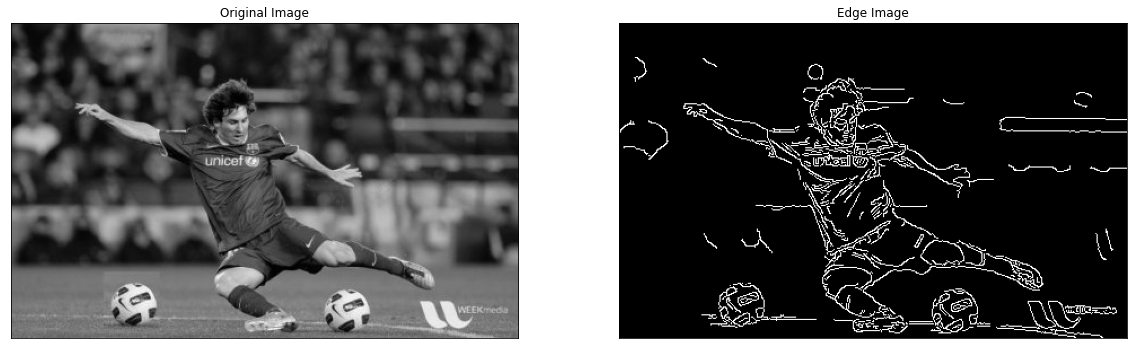

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('messi5.jpg',0)
edges = cv2.Canny(img,100,200)
plt.rcParams['figure.figsize'] = [20, 10]
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

# Histograms 

#### Goal:
• Find histograms, using both OpenCV and Numpy functions

• Plot histograms, using OpenCV and Matplotlib functions

• Use histogram equalization to improve the contrast of our images

#### What is a histogram ?

You can consider histogram as a graph or plot, which gives you an overall idea about the
intensity distribution of an image. It is a plot with pixel values (ranging from 0 to 255, not always) in X-axis and
corresponding number of pixels in the image on Y-axis.

It is just another way of understanding the image. By looking at the histogram of an image, you get intuition about
contrast, brightness, intensity distribution etc of that image. Almost all image processing tools today, provides features
on histogram.

![](histograms.jpg)

You can see the image and its histogram. (Remember, this histogram is drawn for grayscale image, not color image).
Left region of histogram shows the amount of darker pixels in image and right region shows the amount of brighter
pixels. From the histogram, you can see dark region is more than brighter region, and amount of midtones (pixel
values in mid-range, say around 127) are very less.

#### Histogram Calculation in OpenCV

we use cv2.calcHist() function to find the histogram. Let’s familiarize with the function and its parameters :

cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
1. images : Source image
2. channels : If input is grayscale image, its value is [0]. For color image, you can pass [0],[1] or [2] to calculate
histogram of blue,green or red channel respectively.
3. mask : To find histogram of full image, it is given as “None”. But if you want to find histogram
of particular region of image, you have to create a mask image for that and give it as mask.
4. histSize : this represents our BIN count. For full scale, we pass [256].
5. ranges : this is our RANGE. Normally, it is [0,256].

So let’s start with a sample image. Simply load an image in grayscale mode and find its full histogram.

In [2]:
img = cv2.imread('home.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])

#### Histogram Calculation in Numpy
Numpy also provides you a function, np.histogram(). So instead of calcHist() function, you can try below line

In [3]:
hist,bins = np.histogram(img.ravel(),256,[0,256])

### Plotting Histograms

Matplotlib comes with a histogram plotting function : matplotlib.pyplot.hist()
It directly finds the histogram and plot it. You need not use calcHist() or np.histogram() function to find the histogram.
See the code below:

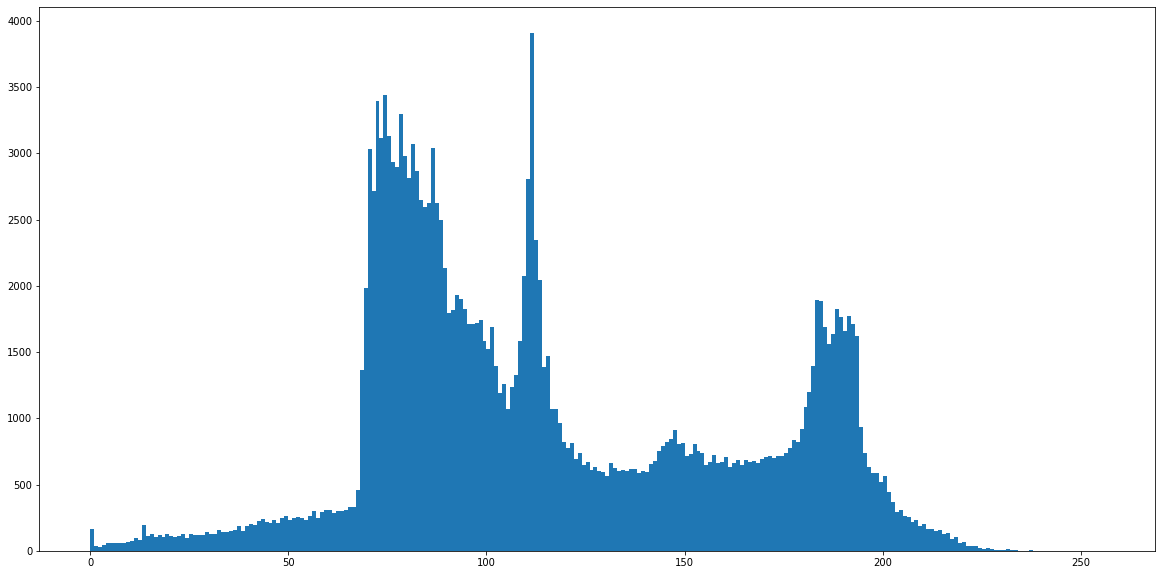

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('home.jpg',0)
plt.hist(img.ravel(),256,[0,256])
plt.show()

### Histogram Equalization

#### Theory
Consider an image whose pixel values are confined to some specific range of values only. For eg, brighter image will
have all pixels confined to high values. But a good image will have pixels from all regions of the image. So you
need to stretch this histogram to either ends (as given in below image, from wikipedia) and that is what Histogram
Equalization does (in simple words). This normally improves the contrast of the image.

![](histogram_eq.jpg)

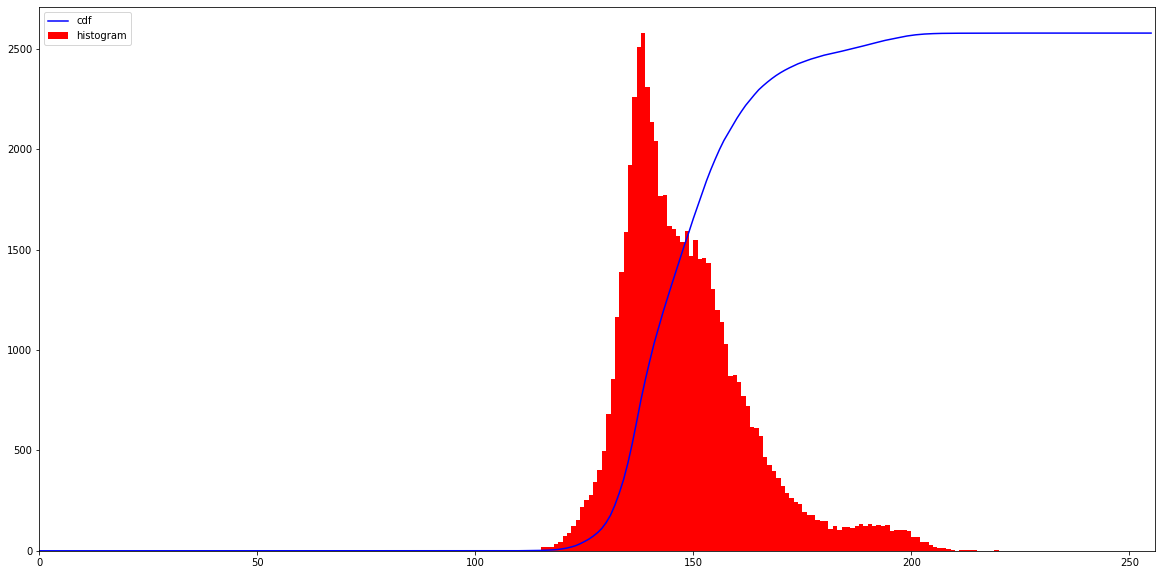

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('wiki.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

You can see histogram lies in brighter region. We need the full spectrum. For that, we need a transformation function
which maps the input pixels in brighter region to output pixels in full region. That is what histogram equalization does.

OpenCV has a function to do this, cv2.equalizeHist(). Its input is just grayscale image and output is our histogram
equalized image.
Below is a simple code snippet showing its usage

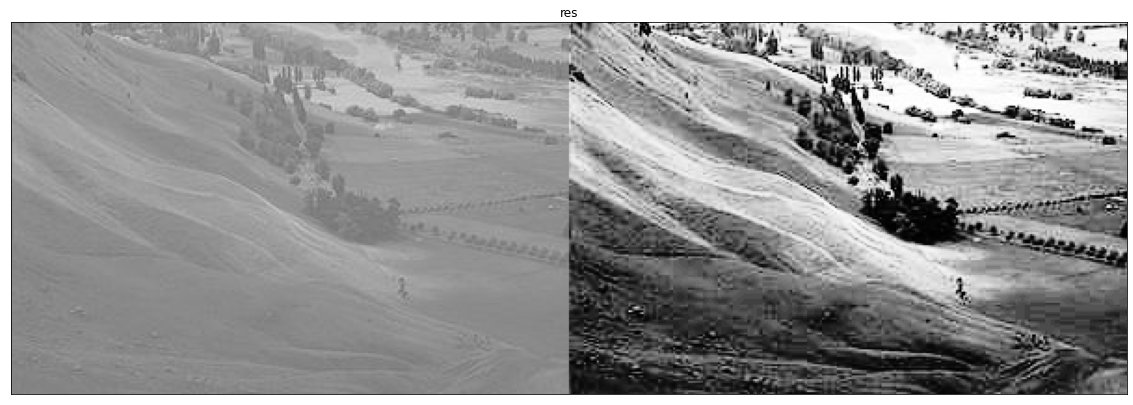

In [3]:
img = cv2.imread('wiki.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)
plt.imshow(res,cmap = 'gray')
plt.title('res'), plt.xticks([]), plt.yticks([])
plt.show()

# Contours

#### Goal

• Understand what contours are.

• Learn to find contours, draw contours etc

• You will see these functions : cv2.findContours(), cv2.drawContours()

**What are contours?**

Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color
or intensity. The contours are a useful tool for shape analysis and object detection and recognition.

• For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.

• findContours function modifies the source image. So if you want source image even after finding contours,
already store it to some other variables.

• In OpenCV, finding contours is like finding white object from black background. So remember, object to be
found should be white and background should be black.
Let’s see how to find contours of a binary image:

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

im = cv2.imread('test2.png')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(imgray,127,255,0)

contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

See, there are three arguments in cv2.findContours() function, first one is source image, second is contour retrieval
mode, third is contour approximation method. And it outputs the image, contours and hierarchy. contours is a
Python list of all the contours in the image. Each individual contour is a Numpy array of (x,y) coordinates of boundary
points of the object.

#### How to draw the contours?

To draw the contours, cv2.drawContours function is used. It can also be used to draw any shape provided you
have its boundary points. Its first argument is source image, second argument is the contours which should be passed
as a Python list, third argument is index of contours (useful when drawing individual contour. To draw all contours,
pass -1) and remaining arguments are color, thickness etc.

To draw all the contours in an image:

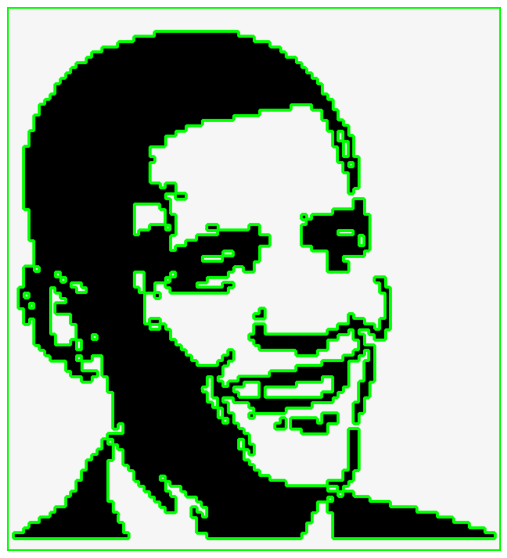

In [6]:
img = cv2.drawContours(im, contours, -1, (0,255,0), 3)
plt.figure()
# Show the first image on the left column
plt.subplot(1,2,1)
plt.imshow(im[:,:,::-1])
# Turn off axis numbering
plt.axis('off')
plt.show()

### Contour Features

#### 1. Moments
Image moments help you to calculate some features like center of mass of the object, area of the object etc.

The function cv2.moments() gives a dictionary of all moment values calculated. See below:

{'m00': 56.0, 'm10': 14448.0, 'm01': 43820.0, 'm20': 3727882.6666666665, 'm11': 11305560.0, 'm02': 34289378.666666664, 'm30': 961947840.0, 'm21': 2917068186.6666665, 'm12': 8846659696.0, 'm03': 26831796670.0, 'mu20': 298.66666666651145, 'mu11': 0.0, 'mu02': 228.66666666418314, 'mu30': 1.1920928955078125e-07, 'mu21': -3.748573362827301e-08, 'mu12': 6.407499313354492e-07, 'mu03': 7.62939453125e-06, 'nu20': 0.09523809523804573, 'nu11': 0.0, 'nu02': 0.07291666666587472, 'nu30': 5.079723018628761e-12, 'nu21': -1.597334777342247e-12, 'nu12': 2.7303511225129592e-11, 'nu03': 3.251022731922407e-10}


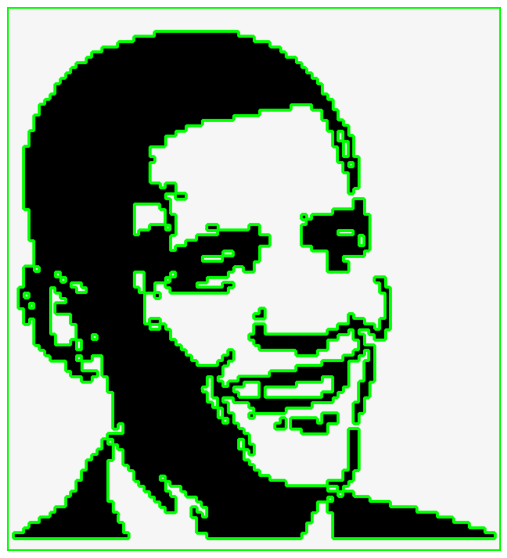

In [7]:
import cv2
import numpy as np
img = cv2.imread('test2.png',0)
ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv2.moments(cnt)
print(M)
img = cv2.drawContours(im,[cnt], -1, (0,255,0), 3)
plt.figure()
# Show the first image on the left column
plt.subplot(1,2,1)
plt.imshow(im[:,:,::-1])
# Turn off axis numbering
plt.axis('off')
plt.show()

From this moments, you can extract useful data like area, centroid etc.

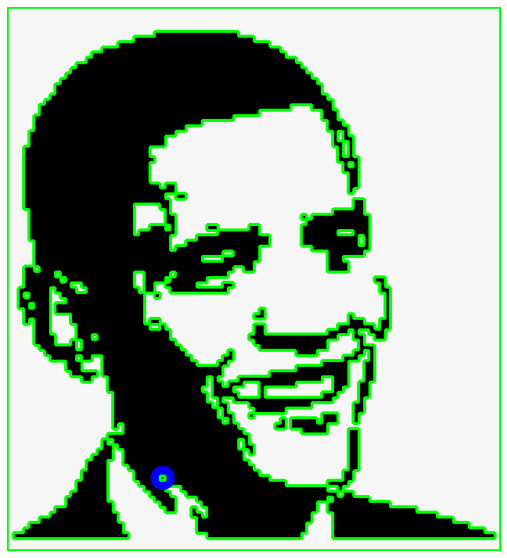

In [8]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
cv2.circle(im,(cx,cy),20,(255,0,0),-1)
img = cv2.drawContours(im,[cnt], -1, (0,255,0), 3)
plt.figure()
# Show the first image on the left column
plt.subplot(1,2,1)
plt.imshow(im[:,:,::-1])
# Turn off axis numbering
plt.axis('off')
plt.show()

#### 2. Contour Area
Contour area is given by the function cv2.contourArea() or from moments, M[’m00’].

In [9]:
area = cv2.contourArea(cnt)
print(area)

56.0


#### 3. Contour Perimeter
It is also called arc length. It can be found out using cv2.arcLength() function. Second argument specify whether
shape is a closed contour (if passed True), or just a curve.

In [10]:
perimeter = cv2.arcLength(cnt,True)
print(perimeter)

30.0


#### 4. Contour Approximation
It approximates a contour shape to another shape with less number of vertices depending upon the precision we specify.
It is an implementation of Douglas-Peucker algorithm.

To understand this, suppose you are trying to find a square in an image, but due to some problems in the image, you
didn’t get a perfect square, but a “bad shape” (As shown in first image below). Now you can use this function to
approximate the shape. In this, second argument is called epsilon, which is maximum distance from contour to
approximated contour. It is an accuracy parameter. A wise selection of epsilon is needed to get the correct output.

In [11]:
import cv2
import numpy as np
img = cv2.imread('contourapp.JPG',0)
ih=img.copy()
ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)
cnt = contours[0]
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

Below, in second image, green line shows the approximated curve for epsilon = 10% of arc length. Third
image shows the same for epsilon = 1% of the arc length. Third argument specifies whether curve is
closed or not.

![](pi.JPG)

#### 5. Bounding Rectangle
There are two types of bounding rectangles-

#### 5.a. Straight Bounding Rectangle
It is a straight rectangle, it doesn’t consider the rotation of the object. So area of the bounding rectangle won’t be
minimum. It is found by the function cv2.boundingRect().

Let (x,y) be the top-left coordinate of the rectangle and (w,h) be its width and height.

In [13]:
x,y,w,h = cv2.boundingRect(cnt)
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

#### 5.b. Rotated Rectangle
Here, bounding rectangle is drawn with minimum area, so it considers the rotation also. The function used is
cv2.minAreaRect(). It returns a Box2D structure which contains following detals - ( top-left corner(x,y), (width,
height), angle of rotation ). But to draw this rectangle, we need 4 corners of the rectangle. It is obtained by the
function cv2.boxPoints()

In [14]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
im = cv2.drawContours(im,[box],0,(0,0,255),2)

![](ll.png)